In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
bankdata = pd.read_csv("datafile.csv")
bankdata.shape


(4187, 14)

In [3]:
bankdata.head()


JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT    NOV  \
0  49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1  332.6  388.5  558.2   
1   0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7  666.2  197.2  359.0   
2  12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7  339.0  181.2  284.4   
3   9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1  820.4  222.2  308.7   
4   1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5  297.0  260.7   25.4   

     DEC  ANNUAL  FLOOD  
0   33.6  3373.2      1  
1  160.5  3520.7      1  
2  225.0  2957.4      0  
3   40.1  3079.6      1  
4  344.7  2566.7      0

In [4]:
X = bankdata.drop('FLOOD', axis=1)
y = bankdata['FLOOD']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
1658       0        0.0
3628       1        1.0
1413       0        0.0
3492       0        0.0
3148       0        0.0
...      ...        ...
3869       0        0.0
3529       0        0.0
1066       0        0.0
3837       0        0.0
2041       0        0.0

[838 rows x 2 columns]

In [9]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.007159904534606206
Mean Squared Error: 0.007159904534606206
Root Mean Squared Error: 0.08461621909897774


In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9928400954653938


D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


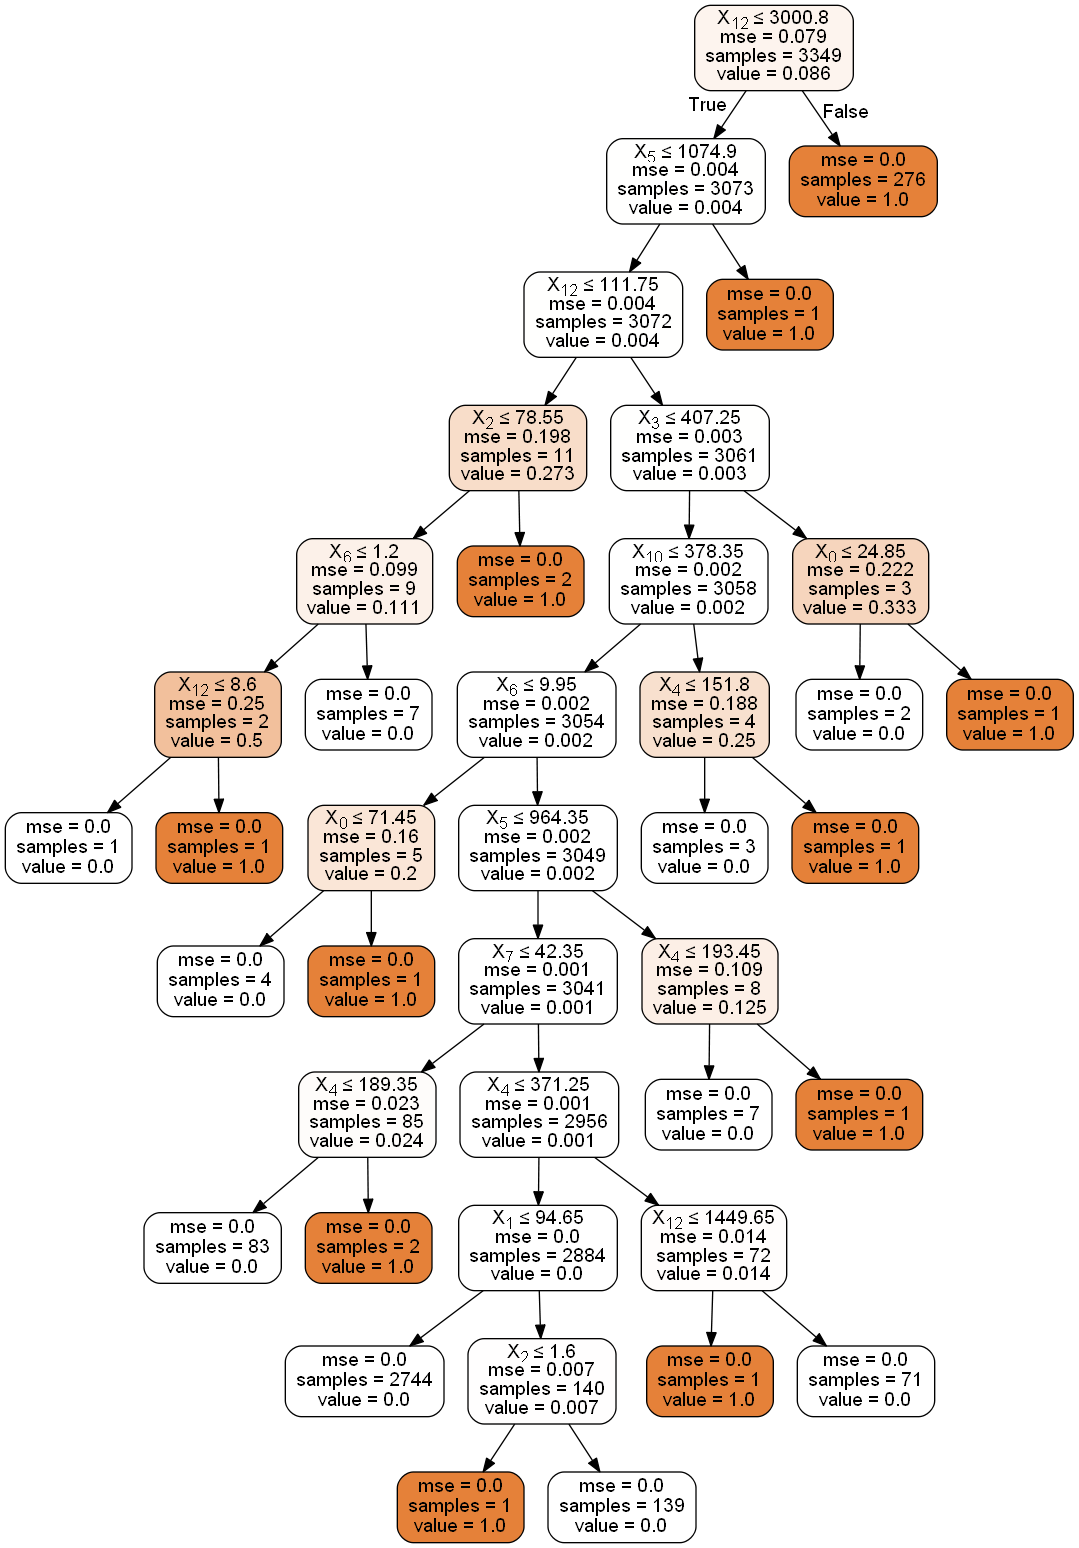

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())